In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

In [2]:
ds = sg.load_dataset("../data/Gorilla_gorilla_gorilla")
ds

<xarray.Dataset> Size: 6GB
Dimensions:               (variants: 21463034, samples: 46, ploidy: 2,
                           contigs: 26, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/16)
    call_genotype         (variants, samples, ploidy) int8 2GB dask.array<chunksize=(1000, 46, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 2GB dask.array<chunksize=(1000, 46, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 987MB dask.array<chunksize=(1000, 46), meta=np.ndarray>
    contig_id             (contigs) object 208B dask.array<chunksize=(26,), meta=np.ndarray>
    contig_length         (contigs) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_filter        (variants, filters) bool 43MB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [3]:
missing_rate_inds = ds.call_genotype_mask[:,:,1].sum(axis=0).values/ds.call_genotype_mask[:,:,1].count(axis=0).values
ds = ds.isel(samples=(missing_rate_inds <= 0.1))
ds["sample_cohort"] = xr.DataArray(range(len(ds.samples)), dims="samples")
ds

<xarray.Dataset> Size: 3GB
Dimensions:               (variants: 21463034, samples: 21, ploidy: 2,
                           contigs: 26, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/17)
    call_genotype         (variants, samples, ploidy) int8 901MB dask.array<chunksize=(1000, 21, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 901MB dask.array<chunksize=(1000, 21, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 451MB dask.array<chunksize=(1000, 21), meta=np.ndarray>
    contig_id             (contigs) object 208B dask.array<chunksize=(26,), meta=np.ndarray>
    contig_length         (contigs) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    sample_cohort         (samples) int64 168B 0 1 2 3 4 5 ... 15 16 17 18 19 20
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [4]:
ds.contig_length.values, ds.contig_id.values

(array([2.43847345e+08, 2.15253457e+08, 2.15373162e+08, 1.95332687e+08,
        1.99452338e+08, 1.70803427e+08, 1.58533252e+08, 1.50804130e+08,
        1.47876701e+08, 1.54228409e+08, 1.50248535e+08, 1.45906006e+08,
        1.34695396e+08, 1.32018348e+08, 1.31692671e+08, 1.07915467e+08,
        1.16054869e+08, 1.31347499e+08, 1.20452965e+08, 8.03129280e+07,
        8.44432190e+07, 5.95073140e+07, 5.47697970e+07, 1.77558554e+08,
        6.74057480e+07, 1.64120000e+04]),
 array(['NC_073224.2', 'NC_086017.1', 'NC_073227.2', 'NC_073228.2',
        'NC_073229.2', 'NC_073230.2', 'NC_073231.2', 'NC_073232.2',
        'NC_073233.2', 'NC_073234.2', 'NC_073235.2', 'NC_073236.2',
        'NC_073237.2', 'NC_073238.2', 'NC_073239.2', 'NC_073240.2',
        'NC_073241.2', 'NC_073242.2', 'NC_073243.2', 'NC_073244.2',
        'NC_073245.2', 'NC_073246.2', 'NC_086018.1', 'NC_073247.2',
        'NC_073248.2', 'NC_011120.1'], dtype=object))

In [5]:
#Guess is that last chrom is chrX. Note that there actually also is a contig 24 (Y) and contig 25 (Mitochondria)
pd.Series(ds.variant_contig.values).value_counts()

0     1627541
2     1588843
1     1498730
4     1332382
5     1199257
3     1178356
6     1153274
7     1048980
8     1020183
10     987279
9      973588
11     865730
12     854911
13     791558
18     763742
14     695159
23     666044
16     612986
15     564824
17     555624
20     466439
19     417460
21     328392
22     271752
Name: count, dtype: int64

In [6]:
ds_X = ds.isel(contigs=(23))
ds_X

<xarray.Dataset> Size: 3GB
Dimensions:               (variants: 21463034, samples: 21, ploidy: 2,
                           filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: variants, samples, ploidy, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/17)
    call_genotype         (variants, samples, ploidy) int8 901MB dask.array<chunksize=(1000, 21, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 901MB dask.array<chunksize=(1000, 21, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 451MB dask.array<chunksize=(1000, 21), meta=np.ndarray>
    contig_id             object 8B dask.array<chunksize=(), meta=np.ndarray>
    contig_length         float64 8B dask.array<chunksize=(), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    sample_cohort         (samples) int64 168B 0 1 2 3 4 5 ... 15 16 17 18 19 20
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [7]:
ds_X.sample_id.values

array(['PD_0180', 'PD_0181', 'PD_0182', 'PD_0183', 'PD_0184', 'PD_0185',
       'PD_0186', 'PD_0188', 'PD_0189', 'PD_0190', 'PD_0191', 'PD_0192',
       'PD_0193', 'PD_0194', 'PD_0195', 'PD_0196', 'PD_0197', 'PD_0198',
       'SAMN01920484', 'SAMN01920485', 'SAMN01920489'], dtype=object)

In [8]:
ds_X.contig_length.values

array(1.77558554e+08)

In [9]:
ds_X.call_genotype[:,20][:20].values

array([[ 0,  0],
       [ 0,  1],
       [ 0,  0],
       [ 0,  1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [ 0,  0],
       [-1, -1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0]], dtype=int8)

In [10]:
cov_summaries = glob.glob("/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024/Gorilla_gorilla_gorilla/cov/*")

In [11]:
df_l = []
for p in cov_summaries:
    print(p.split("/")[-1].split(".")[0])
    df = pd.read_csv(p, sep="\t", names=["Name", "Contig", "start", "end", "length", "?", "coverage"])
    df["ID"] = p.split("/")[-1].split(".")[0]
    df_l.append(df)
df_cov = pd.concat(df_l)

SAMN01920495
PD_0183
SAMEA868694
PD_0184
SAMN01920492
SAMEA112772575
SAMEA112772572
SAMEA112772547
SAMEA112772591
SAMN01920478
SAMEA112772549
SAMEA112772558
SAMEA112772589
SAMEA112772551
SAMN35877944
SAMEA112772580
SAMEA112772556
SAMEA112772587
SAMN01920503
SAMEA112772563
SAMEA112772564
SAMN01920483
PD_0195
PD_0192
SAMN01920484
SAMEA112772548
SAMN01920477
SAMEA112772590
SAMN01920479
SAMEA112772573
SAMEA112772574
SAMN01920493
PD_0185
PD_0182
SAMN01920494
SAMEA868695
SAMN01920485
PD_0193
PD_0194
SAMN01920482
SAMEA112772565
SAMN01920502
SAMEA112772562
SAMN02333813
SAMEA112772557
SAMEA112772586
SAMEA112772550
SAMN35877945
SAMEA112772581
SAMEA112772559
SAMEA112772588
PD_0197
SAMN01920481
SAMEA112772568
SAMN01920486
PD_0190
SAMN01920488
SAMN01920501
SAMEA112772561
SAMEA112772566
SAMEA112772553
SAMEA112772582
SAMEA112772554
SAMEA112772585
SAMEA112772594
SAMEA112772577
PD_0188
SAMEA112772570
SAMN01920499
SAMEA868698
PD_0181
SAMN01920497
SAMEA868696
SAMEA112772579
SAMN01920490
PD_0186
SAMN02333

In [12]:
df_cov["Contig_type"] = ["chrX" if x == "postPAR1" else "non-X" for x in df_cov.Name]

<Axes: xlabel='coverage', ylabel='Count'>

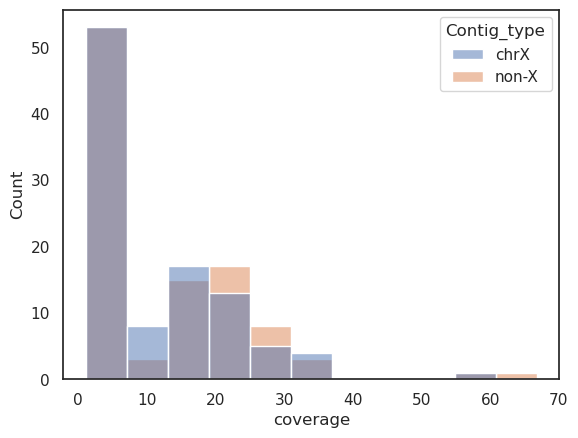

In [13]:
sns.histplot(df_cov.groupby(["ID", "Contig_type"])["coverage"].median().reset_index(), x="coverage", hue="Contig_type")

In [14]:
df_group = df_cov.groupby(["ID", "Contig_type"])["coverage"].median().reset_index()
non_X = df_group.loc[df_group.Contig_type == "non-X"]
df_cov["aut_cov"] = df_cov.ID.map(dict(zip(non_X.ID, non_X.coverage)))
df_cov["relative_cov"] = df_cov.coverage/df_cov.aut_cov

In [15]:
df_cov

,Name,Contig,start,end,length,?,coverage,ID,Contig_type,aut_cov,relative_cov
0,NC_073224.2,NC_073224.2,1,243847345,239752752,4203819301,17.53400,SAMN01920495,non-X,17.83560,0.983090
1,NC_086017.1,NC_086017.1,1,215253457,212720055,3966143448,18.64490,SAMN01920495,non-X,17.83560,1.045376
2,NC_073227.2,NC_073227.2,1,215373162,210274335,4141899393,19.69760,SAMN01920495,non-X,17.83560,1.104398
3,NC_073228.2,NC_073228.2,1,195332687,192154248,3471288490,18.06510,SAMN01920495,non-X,17.83560,1.012868
4,NC_073229.2,NC_073229.2,1,199452338,194795376,3670749101,18.84410,SAMN01920495,non-X,17.83560,1.056544
...,...,...,...,...,...,...,...,...,...,...,...
23,prePAR1,NC_073247.2,1,9544188,634357,1212259,1.91100,SAMEA112772592,non-X,1.66473,1.147934
24,PAR1,NC_073247.2,9544189,12039748,1290435,2365251,1.83291,SAMEA112772592,non-X,1.66473,1.101025
25,postPAR1,NC_073247.2,12039749,177558554,89236689,150482758,1.68633,SAMEA112772592,chrX,1.66473,1.012975
26,NC_073248.2,NC_073248.2,1,67405748,2057842,3286700,1.59716,SAMEA112772592,non-X,1.66473,0.959411


In [16]:
df_cov.loc[df_cov.Contig_type == "chrX"]

,Name,Contig,start,end,length,?,coverage,ID,Contig_type,aut_cov,relative_cov
25,postPAR1,NC_073247.2,12039749,177558554,163068284,3045337189,18.67520,SAMN01920495,chrX,17.83560,1.047074
25,postPAR1,NC_073247.2,12039749,177558554,164813287,4856860223,29.46890,PD_0183,chrX,29.93370,0.984472
25,postPAR1,NC_073247.2,12039749,177558554,8248939,14625925,1.77307,SAMEA868694,chrX,1.82136,0.973487
25,postPAR1,NC_073247.2,12039749,177558554,163232980,1854717774,11.36240,PD_0184,chrX,21.22200,0.535407
25,postPAR1,NC_073247.2,12039749,177558554,162806342,2875447802,17.66180,SAMN01920492,chrX,16.90380,1.044842
...,...,...,...,...,...,...,...,...,...,...,...
25,postPAR1,NC_073247.2,12039749,177558554,186849,308567,1.65142,SAMEA112772571,chrX,1.64249,1.005437
25,postPAR1,NC_073247.2,12039749,177558554,162829158,1809837499,11.11490,SAMN01920498,chrX,11.05870,1.005082
25,postPAR1,NC_073247.2,12039749,177558554,2016517,3992766,1.98003,SAMEA112772576,chrX,2.05533,0.963364
25,postPAR1,NC_073247.2,12039749,177558554,164769166,3628451390,22.02140,PD_0189,chrX,21.77460,1.011334


<Axes: xlabel='relative_cov', ylabel='Count'>

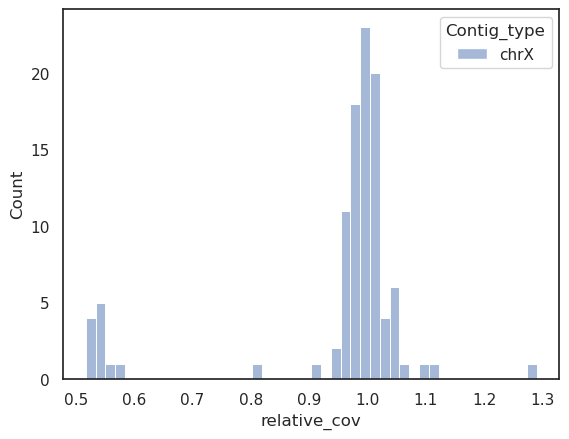

In [17]:
sns.histplot(df_cov.loc[df_cov.Contig_type == "chrX"], x="relative_cov", hue="Contig_type")

[(-2.0, 100.0), (-1.0, 5.0)]

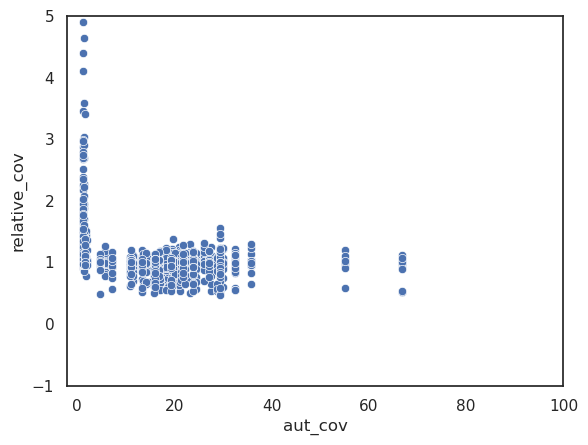

In [34]:
g = sns.scatterplot(df_cov.loc[df_cov.Contig != "NC_011120.1"], y="relative_cov", x="aut_cov")
g.set(xlim=(-2, 100), ylim=(-1, 5))

In [37]:
x_cov_determination = df_cov.loc[df_cov.Contig_type == "chrX"]
x_cov_determination["sex"] = ["F" if x >= 0.75 else "M" for x in x_cov_determination.relative_cov]

/tmp/59998804/ipykernel_3664081/3904995196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cov_determination["sex"] = ["F" if x >= 0.75 else "M" for x in x_cov_determination.relative_cov]


In [39]:
x_cov_determination.sex.value_counts()

sex
F    90
M    11
Name: count, dtype: int64

In [43]:
# The strangest individual is PD_0187, with a ratio of 0.8
x_cov_determination.loc[(x_cov_determination.sex == "F") & (x_cov_determination.coverage >= 10)]

,Name,Contig,start,end,length,?,coverage,ID,Contig_type,aut_cov,relative_cov,sex
25,postPAR1,NC_073247.2,12039749,177558554,163068284,3045337189,18.6752,SAMN01920495,chrX,17.8356,1.047074,F
25,postPAR1,NC_073247.2,12039749,177558554,164813287,4856860223,29.4689,PD_0183,chrX,29.9337,0.984472,F
25,postPAR1,NC_073247.2,12039749,177558554,162806342,2875447802,17.6618,SAMN01920492,chrX,16.9038,1.044842,F
25,postPAR1,NC_073247.2,12039749,177558554,164331886,2838529475,17.2732,SAMN01920478,chrX,16.9586,1.018551,F
25,postPAR1,NC_073247.2,12039749,177558554,165470879,9288798369,56.1355,SAMN35877944,chrX,55.1653,1.017587,F
25,postPAR1,NC_073247.2,12039749,177558554,163319375,2217565736,13.5781,SAMN01920503,chrX,13.2428,1.025319,F
25,postPAR1,NC_073247.2,12039749,177558554,163842809,3255732036,19.8711,SAMN01920483,chrX,20.4510,0.971644,F
25,postPAR1,NC_073247.2,12039749,177558554,163115793,3337675186,20.4620,PD_0195,chrX,20.9575,0.976357,F
25,postPAR1,NC_073247.2,12039749,177558554,163600948,4154854609,25.3963,SAMN01920484,chrX,26.1234,0.972167,F
25,postPAR1,NC_073247.2,12039749,177558554,164381866,2787676537,16.9585,SAMN01920477,chrX,16.6287,1.019833,F


In [57]:
x_cov_determination.loc[(x_cov_determination.sex == "M") & (x_cov_determination.coverage >= 10)]

,Name,Contig,start,end,length,?,coverage,ID,Contig_type,aut_cov,relative_cov,sex
25,postPAR1,NC_073247.2,12039749,177558554,163232980,1854717774,11.3624,PD_0184,chrX,21.2220,0.535407,M
25,postPAR1,NC_073247.2,12039749,177558554,163097791,2405703129,14.7501,PD_0192,chrX,27.5785,0.534841,M
25,postPAR1,NC_073247.2,12039749,177558554,163221700,2227772407,13.6488,SAMN01920482,chrX,24.3468,0.560599,M
25,postPAR1,NC_073247.2,12039749,177558554,163768757,5653363409,34.5204,SAMN35877945,chrX,66.7636,0.517054,M
25,postPAR1,NC_073247.2,12039749,177558554,162815674,2542485841,15.6157,PD_0197,chrX,29.2973,0.533008,M
25,postPAR1,NC_073247.2,12039749,177558554,162400589,2473940156,15.2336,PD_0198,chrX,28.7907,0.529115,M
25,postPAR1,NC_073247.2,12039749,177558554,162319675,2051682736,12.6398,PD_0191,chrX,23.7409,0.532406,M
25,postPAR1,NC_073247.2,12039749,177558554,161315715,1690162648,10.4774,SAMN01920491,chrX,19.3062,0.542696,M


In [18]:
#Only using 3 chroms for aut for computational speed
ds_aut = ds.isel(contigs=[13, 14, 15]) #ds.isel(contigs=(slice(0, 23)))
np.unique(ds_aut.contigs.values)

array([0, 1, 2])

In [19]:
ds_aut.contig_length.values

array([1.32018348e+08, 1.31692671e+08, 1.07915467e+08])

Now that I have understood Vasili's coverage work, it is time to check how well it holds up in the sgkit zarr files.

In [45]:
ds_X = sg.individual_heterozygosity(ds_X)

<Axes: ylabel='Count'>

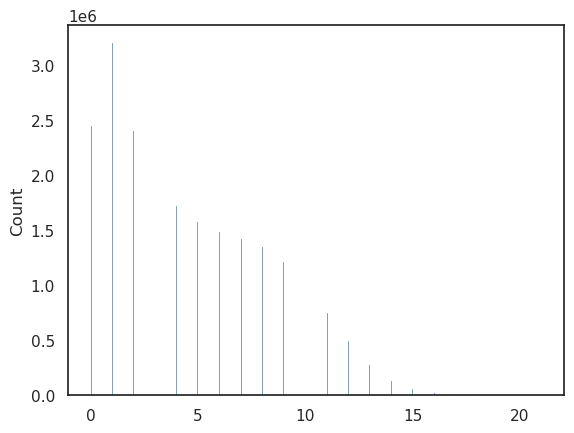

In [55]:
sns.histplot(np.nansum(ds_X.call_heterozygosity.values,axis=1))

In [66]:
ds_X.sample_id.values
ds_X16 = ds_X.isel(samples=(16))

In [86]:
# There is a contig error if contig_length = 1, so I window before subsetting to a single chrom.
# Subsetting to a single ind
ds_w10000 = sg.window_by_variant(ds, size=10000)
ds_16 = ds_w10000.isel(samples=(16))

In [87]:
ds_16

<xarray.Dataset> Size: 923MB
Dimensions:               (windows: 2157, variants: 21463034, ploidy: 2,
                           contigs: 26, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Dimensions without coordinates: windows, variants, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/20)
    window_contig         (windows) int64 17kB 0 0 0 0 0 0 ... 23 23 23 23 23 23
    window_start          (windows) int64 17kB 0 10000 ... 21446990 21456990
    window_stop           (windows) int64 17kB 10000 20000 ... 21456990 21463034
    call_genotype         (variants, ploidy) int8 43MB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    call_genotype_mask    (variants, ploidy) bool 43MB dask.array<chunksize=(1000, 2), meta=np.ndarray>
    call_genotype_phased  (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(1000,), meta=np.ndarray>
    sample_cohort         int64 8B 16
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

Notes on how to handle the diversity investigation in windows.
Window, calculate diversity with unique (single) sample_cohorts, subset for contigs, extract.